## Alternative preprocessing

In [67]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('PDataset_adj.xlsx')
X = dataset[['Explosive type', 'Explosive mass', 'Standoff distance']]
y = dataset['Peak incident pressure']
feature_names = X.columns
print (X)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Explosive type'])], remainder='passthrough')
X = ct.fit_transform(X)

#Getting the feature names
new_feature_names = ct.get_feature_names_out(feature_names)
print (X)

features = ['Explosive type-CompB', 'Explosive type-TNT', 'Explosive mass', 'Standoff distance']
#Turning back into a dataframe
X = pd.DataFrame(X, columns= features)
print (X)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)
print (X_train)

    Explosive type  Explosive mass  Standoff distance
0              TNT             0.5                1.0
1              TNT             0.5                1.5
2              TNT             0.5                2.5
3              TNT             0.5                3.5
4              TNT             0.5                4.5
..             ...             ...                ...
583  Composition B            25.0               19.5
584  Composition B            25.0               20.0
585  Composition B            25.0                2.5
586  Composition B            25.0                3.5
587  Composition B            25.0                4.5

[588 rows x 3 columns]
[[ 0.   1.   0.5  1. ]
 [ 0.   1.   0.5  1.5]
 [ 0.   1.   0.5  2.5]
 ...
 [ 1.   0.  25.   2.5]
 [ 1.   0.  25.   3.5]
 [ 1.   0.  25.   4.5]]
     Explosive type-CompB  Explosive type-TNT  Explosive mass  \
0                     0.0                 1.0             0.5   
1                     0.0                 1.0         

## Training the XGB Regression model on the Training set

In [68]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 300,
                         max_depth = 3,
                         gamma = 0.1, 
                         learning_rate = 0.3,
                         random_state = 55)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=55, ...)

## Predicting the Test set results

In [69]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)
print(file)

[[ 115.8   115.07]
 [ 679.99  647.73]
 [ 137.01  136.62]
 [ 106.15  104.27]
 [ 187.23  195.11]
 [ 514.64  565.36]
 [2627.4  2554.7 ]
 [ 214.35  207.89]
 [ 141.87  137.7 ]
 [6365.24 6297.53]
 [ 110.87  111.16]
 [ 126.13  122.24]
 [ 130.16  127.41]
 [ 114.6   116.22]
 [ 865.03  804.61]
 [1411.57 1372.28]
 [ 162.06  164.22]
 [ 119.14  113.81]
 [ 138.07  135.78]
 [ 535.37  591.28]
 [ 175.41  171.59]
 [ 151.12  148.89]
 [ 242.85  250.6 ]
 [ 102.71  109.74]
 [ 270.98  278.2 ]
 [ 123.63  123.17]
 [ 189.57  186.31]
 [ 314.04  309.78]
 [ 125.02  131.03]
 [ 270.96  263.48]
 [ 217.12  215.56]
 [ 112.21  110.72]
 [ 112.01  108.46]
 [ 136.89  131.18]
 [ 116.46  112.41]
 [ 113.41  114.04]
 [ 134.95  132.17]
 [2366.29 2259.19]
 [ 117.59  116.61]
 [ 120.78  121.  ]
 [ 109.84  108.76]
 [ 110.51  110.71]
 [ 127.94  123.78]
 [ 120.45  122.17]
 [ 205.73  200.22]
 [ 116.38  111.97]
 [ 169.    169.94]
 [ 101.54  103.07]
 [ 150.81  158.21]
 [ 139.8   137.57]
 [5704.69 6015.07]
 [ 203.96  200.66]
 [ 140.07  1

## SHAP

In [5]:
import shap
print (shap.__version__)

0.44.0


In [70]:
# Create object that can calculate shap values for an ensemble tree model
explainer = shap.TreeExplainer(regressor)

[23:58:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [71]:
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

In [72]:
cmap = (mpl.colors.ListedColormap(['blue','orange', 'red'])
        .with_extremes(under='yellow', over='red'))

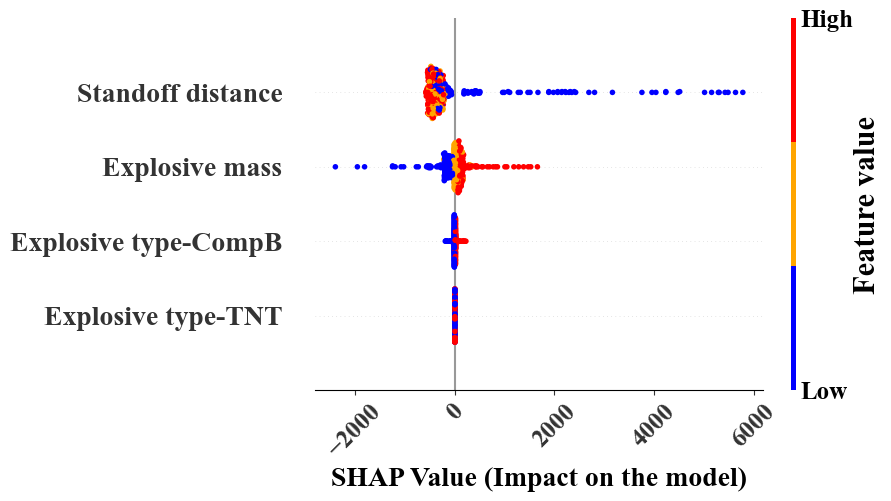

In [76]:
#Summary plot type 2
shap.summary_plot(shap_values, X_train, feature_names=features, show=False,cmap = cmap)
# Get the current figure and axes objects.
fig = plt.gcf()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.gcf().set_size_inches(8,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20, weight='bold')
plt.yticks(fontsize = 20,weight='bold')
plt.xticks(fontsize = 18,weight='bold', rotation=45)

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=18)
cb_ax.set_ylabel("Feature value", fontsize=22, weight='bold')
plt.savefig('Images/SHAP1.png', dpi = 600, bbox_inches = 'tight')
plt.show()

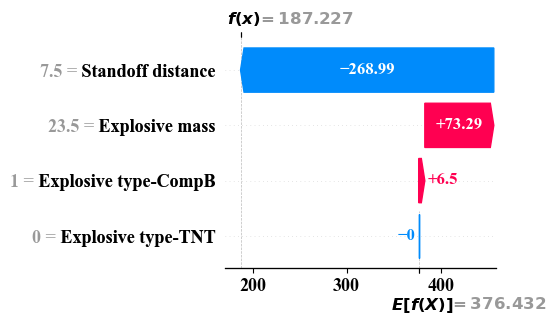

In [77]:
#Waterfall Plot (for an instance)
explainer2 = shap.Explainer(regressor.predict, X_test)
#X_test.columns=features
shap_values2 = explainer2(X_test)
shap.waterfall_plot(shap_values2[4], show=False)
plt.gcf()
plt.gcf().set_size_inches(3.5,3)
plt.rcParams['font.weight'] = 'bold'

plt.savefig('Images/SHAP2.png', dpi = 600, bbox_inches = 'tight')
plt.show()

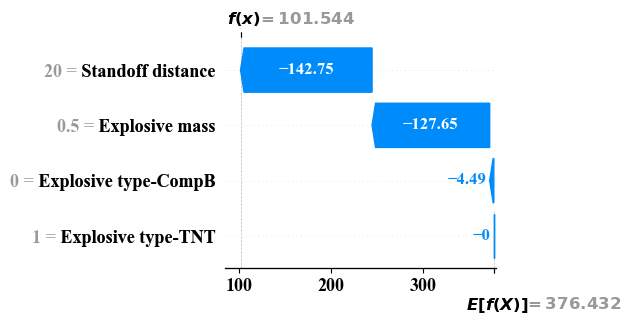

In [78]:
#Waterfall Plot (for an instance)
explainer2 = shap.Explainer(regressor.predict, X_test)
#X_test.columns=features
shap_values2 = explainer2(X_test)
shap.waterfall_plot(shap_values2[47], show=False)
plt.gcf()
plt.gcf().set_size_inches(3.5,3)
plt.rcParams['font.weight'] = 'bold'

plt.savefig('Images/SHAP3.png', dpi = 600, bbox_inches = 'tight')
plt.show()

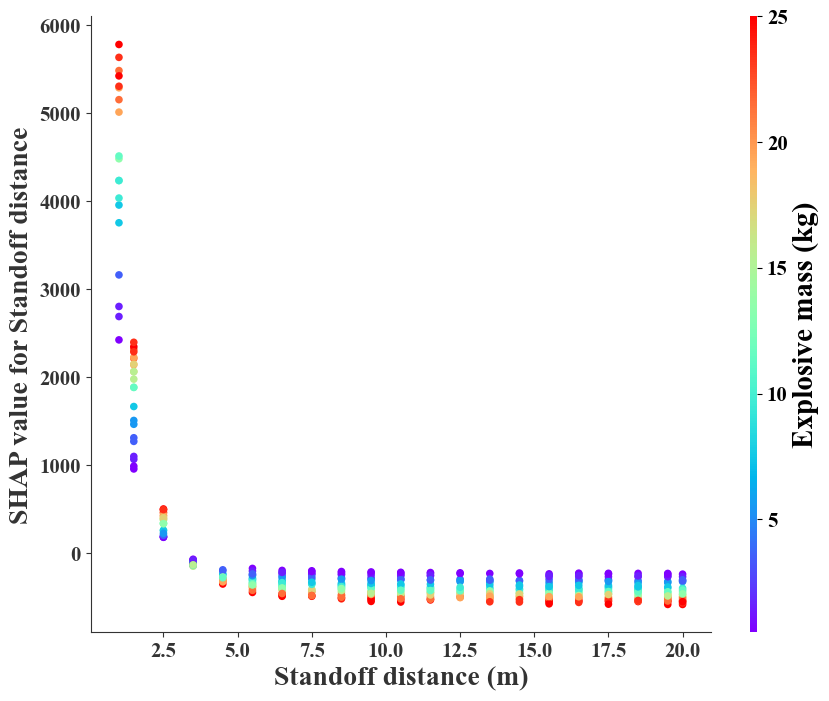

In [79]:
#Partial Dependenace Plot
shap.dependence_plot(3, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig1 = plt.gcf()
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Standoff distance", fontsize = 20,weight='bold')
plt.xlabel("Standoff distance (m)",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax1 = fig1.axes[1] 

# Modifying color bar parameters
cb_ax1.tick_params(labelsize=15)
cb_ax1.set_ylabel("Explosive mass (kg)", fontsize=21, weight='bold')
plt.savefig('Images/SHAP4.png', dpi = 600, bbox_inches = 'tight')
plt.show()

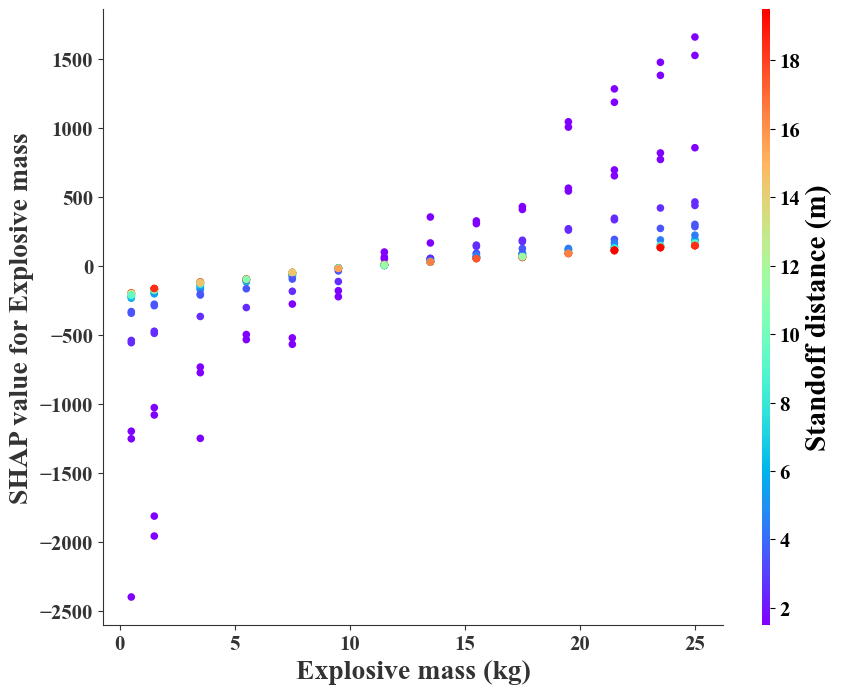

In [83]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig2 = plt.gcf()
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Explosive mass", fontsize = 20,weight='bold')
plt.xlabel("Explosive mass (kg)",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
# Get colorbar
cb_ax2 = fig2.axes[1] 

# Modifying color bar parameters
cb_ax2.tick_params(labelsize=15)
cb_ax2.set_ylabel("Standoff distance (m)", fontsize=21, weight='bold')
plt.savefig('Images/SHAP5.png', dpi = 600, bbox_inches = 'tight')
plt.show()

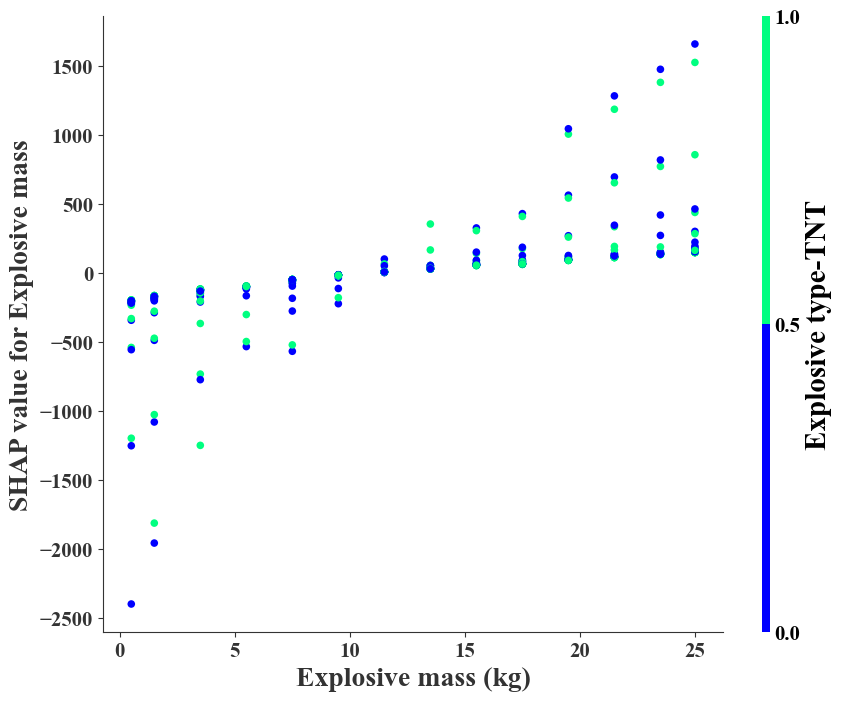

In [84]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, interaction_index = 1, show=False, dot_size = 30, cmap=plt.get_cmap("winter"))
fig3 = plt.gcf()
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Explosive mass", fontsize = 20,weight='bold')
plt.xlabel("Explosive mass (kg)",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
#plt.grid (visible = True, which = 'major', axis = 'y')
# Get colorbar
cb_ax3 = fig3.axes[1] 

# Modifying color bar parameters
cb_ax3.tick_params(labelsize=15)
cb_ax3.set_ylabel("Explosive type-TNT", fontsize=21, weight='bold')
plt.savefig('Images/SHAP6.png', dpi = 600, bbox_inches = 'tight')
plt.show()